# Explorar datos
* Obtener estadisticas basicas
* Graficar las variables
    - Histogramas
    - Box plots
    - Scartter plots
* Calcular correlacion con la variable objetivo


In [ ]:
! pip install numpy pandas plotly scipy pysqlite3

In [68]:
import numpy as np
import os
import pandas as pd
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import plotly.express as px
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Preguntas
* Cuales son las estadisticas descriptivas de la base de autos?

In [17]:
df = pd.read_csv("data/CARS.csv")

In [24]:
conn = sqlite3.connect('data/db_cars')
c = conn.cursor()

In [5]:
df.to_sql('cars', conn, if_exists='replace', index = False)

In [6]:
df.head(10)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197
5,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,"$46,100","$41,100",3.5,6.0,225,18,24,3893,115,197
6,Acura,NSX coupe 2dr manual S,Sports,Asia,Rear,"$89,765","$79,978",3.2,6.0,290,17,24,3153,100,174
7,Audi,A4 1.8T 4dr,Sedan,Europe,Front,"$25,940","$23,508",1.8,4.0,170,22,31,3252,104,179
8,Audi,A41.8T convertible 2dr,Sedan,Europe,Front,"$35,940","$32,506",1.8,4.0,170,23,30,3638,105,180
9,Audi,A4 3.0 4dr,Sedan,Europe,Front,"$31,840","$28,846",3.0,6.0,220,20,28,3462,104,179


In [7]:
df.describe()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [8]:
df.describe(include="all")

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428,428,428,428,428,428,428,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
unique,38,425,6,3,3,410,425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Toyota,G35 4dr,Sedan,Asia,Front,"$29,995","$19,638",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,28,2,262,158,226,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000


In [54]:
query_str = """
    SELECT make, count(*), max(Invoice)
    FROM CARS
    GROUP BY make
    ORDER BY 2 desc
"""


In [55]:
df_qry = pd.DataFrame(c.execute(query_str).fetchall(), columns =["make","num","mean"])    
df_qry.head(10)

,make,num,mean
0,Toyota,28,"$47,986"
1,Chevrolet,27,"$45,193"
2,Mercedes-Benz,26,"$88,324"
3,Ford,23,"$36,494"
4,BMW,20,"$66,830"
5,Audi,19,"$76,417"
6,Nissan,17,"$31,845"
7,Honda,17,"$29,965"
8,Volkswagen,15,"$69,130"
9,Chrysler,15,"$35,063"


In [57]:
df[["Make","Model","Invoice"]]\
    .groupby(["Make"]).agg({"Model":"count","Invoice":"max"})\
    .sort_values(by="Model",ascending=False).head(10)

,Model,Invoice
Make,,
Toyota,28,"$47,986"
Chevrolet,27,"$45,193"
Mercedes-Benz,26,"$88,324"
Ford,23,"$36,494"
BMW,20,"$66,830"
Audi,19,"$76,417"
Honda,17,"$29,965"
Nissan,17,"$31,845"
Volkswagen,15,"$69,130"


In [77]:
df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP            object
Invoice        float64
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

In [61]:
df["Invoice"] = df["Invoice"].replace('[\$,]', '', regex=True).astype(float)

In [62]:
df[["Make","Model","Invoice"]]\
    .groupby(["Make"]).agg({"Model":"count","Invoice":"max"})\
    .sort_values(by="Model",ascending=False).head(10)

,Model,Invoice
Make,,
Toyota,28,47986.0
Chevrolet,27,45193.0
Mercedes-Benz,26,119600.0
Ford,23,36494.0
BMW,20,66830.0
Audi,19,76417.0
Honda,17,29965.0
Nissan,17,31845.0
Volkswagen,15,69130.0


<AxesSubplot:>

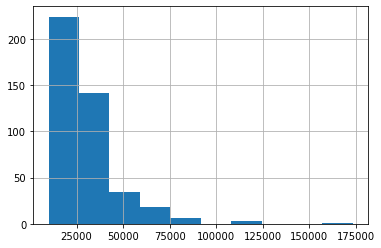

In [107]:
df["Invoice"].hist(bins=10)

In [112]:
fig = px.histogram(df["Invoice"], x="Invoice", nbins=100)
fig.show()

In [97]:
k2, p = stats.normaltest(df[["Invoice"]].query("Invoice <= 50000")["Invoice"].values)
alpha = 1e-3
if p < alpha:
    print("It is not nomal")
else:
    print("It is normal")

It is not nomal


In [121]:
k2, p = stats.normaltest(np.log2(df[['Invoice']].query("Invoice <= 70000")).values)
alpha = 1e-3
if p < alpha:
    print("It is not nomal")
else:
    print("It is normal")

It is normal


In [124]:
fig = px.box(df, x="Make", y="Invoice")
fig.show()

In [78]:
fig = px.scatter_matrix(df[["MPG_Highway","Horsepower","EngineSize","Wheelbase"]])
fig.show()

In [122]:
fig = px.imshow(df.corr(), text_auto=True)
fig.show()

In [ ]:
pd.cut(x=df['Invoice'], bins=[0, 100, 1000, 12000, 10000000])
pd.qcut(df['Invoice'], 4)